### Plot 1 (Macro Plot)

In [2]:
import matplotlib.pyplot as plt
import pandas

df=pandas.read_csv("Mental Health Dataset.csv")
print(df.columns)

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')


In [3]:
print(df["Occupation"].unique())

['Corporate' 'Student' 'Business' 'Housewife' 'Others']


In [4]:
df["self_employed"]=df["self_employed"].fillna('No')
print(df["self_employed"].unique())

df["new_occupation"]= df['Occupation'].apply(lambda x: 'Student' if x == 'Student' else 'Adult')

df["stressing"] = df["Growing_Stress"].apply(lambda x: 1 if x in ["Maybe", "Yes"] else 0)

['No' 'Yes']


In [5]:
new_df=df.loc[:,['stressing', 'new_occupation']]

stress_pct = (new_df.groupby("new_occupation")["stressing"].mean().reset_index())
stress_pct["stressing"] = stress_pct["stressing"] * 100

print(stress_pct)

  new_occupation  stressing
0          Adult  67.007850
1        Student  73.045927


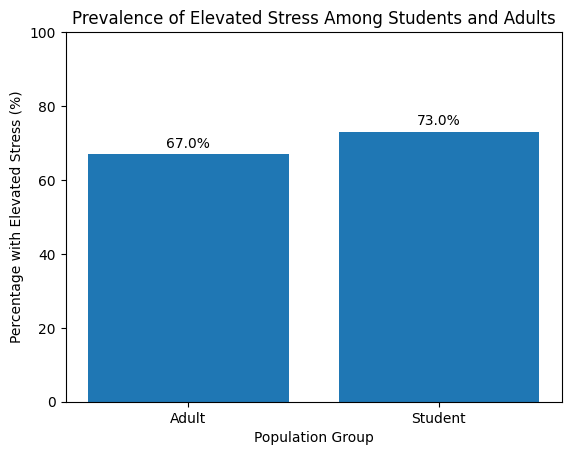

In [6]:
plt.figure()
bars=plt.bar(stress_pct["new_occupation"], stress_pct["stressing"])
plt.ylabel("Percentage with Elevated Stress (%)")
plt.xlabel("Population Group")
plt.title("Prevalence of Elevated Stress Among Students and Adults")
plt.ylim(0, 100)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{height:.1f}%",
        ha="center",
        va="bottom"
    )
plt.show()

### Plot 2 (Micro Plot)

In [6]:
#df['cope_struggle']=df['Coping_Struggles'].apply(lambda x: 1 if x in ["Maybe", "Yes"] else 0)
df['indoor_days']=df['Days_Indoors'].apply(lambda x: '0 day' if x=='Go out Every day' else (">60 days" if x=='More than 2 months' else x))
df['indoor_days']=df['indoor_days'].apply(lambda x: x.split()[0])
df2=df.loc[:,['stressing', 'indoor_days', 'new_occupation']]
print(df2)

        stressing indoor_days new_occupation
0               1        1-14          Adult
1               1        1-14          Adult
2               1        1-14          Adult
3               1        1-14          Adult
4               1        1-14          Adult
...           ...         ...            ...
292359          0       15-30          Adult
292360          0       15-30          Adult
292361          0       15-30          Adult
292362          0       15-30          Adult
292363          0       15-30          Adult

[292364 rows x 3 columns]


In [7]:
df['indoor_days'].unique()

array(['1-14', '0', '>60', '15-30', '31-60'], dtype=object)

In [8]:
valid_days = [
    "1-14",
    "15-30",
    "31-60",
    ">60"
]
# 0 day or "Go out everyday" is omitted as respondent may have misunderstood the phrase of "Number of days Indoor"

df2 = df2[df2["indoor_days"].isin(valid_days)]
print(df2['indoor_days'].unique())

['1-14' '>60' '15-30' '31-60']


In [9]:
micro_df = (
    df2.groupby(["new_occupation", "indoor_days"])["stressing"]
    .mean()
    .reset_index()
)

micro_df["stress_pct"] = micro_df["stressing"] * 100
print(micro_df)

  new_occupation indoor_days  stressing  stress_pct
0          Adult        1-14   0.672642   67.264158
1          Adult       15-30   0.684072   68.407237
2          Adult       31-60   0.630717   63.071709
3          Adult         >60   0.741082   74.108189
4        Student        1-14   0.729450   72.944973
5        Student       15-30   0.626915   62.691515
6        Student       31-60   0.718444   71.844444
7        Student         >60   0.732089   73.208949


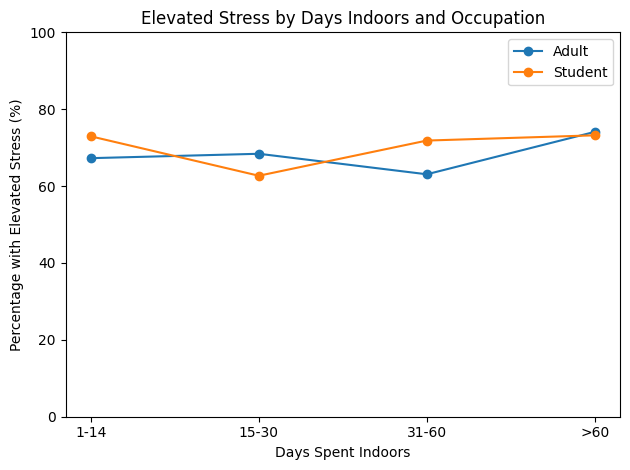

In [10]:
for group in micro_df["new_occupation"].unique():
    subset = micro_df[micro_df["new_occupation"] == group]
    plt.plot(
        subset["indoor_days"],
        subset["stress_pct"],
        marker="o",
        label=group
    )

plt.ylabel("Percentage with Elevated Stress (%)")
plt.xlabel("Days Spent Indoors")
plt.title("Elevated Stress by Days Indoors and Occupation")
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()

### Plot 3 (Actionable Plot)

In [11]:
df3=pandas.read_csv("osmi_mental_health_survey.csv")

In [12]:
df3.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [13]:
df3['care_access']=df3['care_options'].apply(lambda x: "Clear access" if x=="Yes" else "No clear access")
affected = df3[df3["work_interfere"].isin(["Sometimes", "Often"])]

In [14]:
care_counts = (
    affected["care_access"]
    .value_counts(normalize=True)
    .reset_index()
)

care_counts.columns = ["Care Options Available", "Percentage"]
care_counts["Percentage"] *= 100
print(care_counts)

  Care Options Available  Percentage
0        No clear access   57.635468
1           Clear access   42.364532


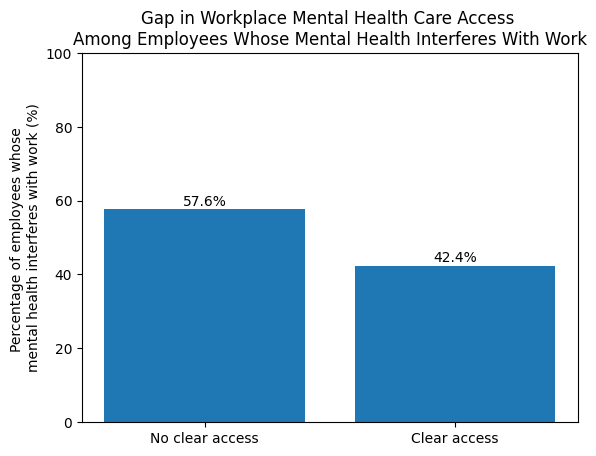

In [15]:
plt.figure()
plt.bar(care_counts["Care Options Available"], care_counts["Percentage"])
plt.ylabel("Percentage of employees whose \nmental health interferes with work (%)")
plt.title("Gap in Workplace Mental Health Care Access \nAmong Employees Whose Mental Health Interferes With Work")
plt.ylim(0, 100)
for i, value in enumerate(care_counts["Percentage"]):
    plt.text(i, value + 1, f"{value:.1f}%", ha="center")
plt.show()